In [5]:

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt


In [11]:
# Load file
df = pd.read_csv("bikes_data.csv")
print(df.head())


         Date  predicted_mean  ci_lower   ci_upper  MoM_growth  YoY_growth
0  2025-10-31        8.604218  8.249561   8.958875    1.664643    8.708249
1  2026-01-31        8.660706  7.762511   9.558901    1.664643    8.708249
2  2026-04-30        8.914614  7.605905  10.223323    1.664643    8.708249
3  2026-07-31        8.990885  7.372650  10.609120    1.664643    8.708249
4  2026-10-31        8.889421  6.896386  10.882456    1.664643    8.708249


              Model          RMSE           MAE  R2 Score
0  LinearRegression  1.025580e-15  5.921189e-16  1.000000
1      DecisionTree  6.758988e-02  6.656521e-02  0.967541
2      RandomForest  9.781350e-02  7.637860e-02  0.932022
3  GradientBoosting  6.758953e-02  6.656496e-02  0.967541
4               KNN  2.173418e-01  1.785866e-01  0.664373
5               SVR  1.323606e-01  1.180818e-01  0.875523

 Model Performance Comparison Table
              Model          RMSE           MAE  R2 Score
0  LinearRegression  1.025580e-15  5.921189e-16  1.000000
3  GradientBoosting  6.758953e-02  6.656496e-02  0.967541
1      DecisionTree  6.758988e-02  6.656521e-02  0.967541
2      RandomForest  9.781350e-02  7.637860e-02  0.932022
5               SVR  1.323606e-01  1.180818e-01  0.875523
4               KNN  2.173418e-01  1.785866e-01  0.664373


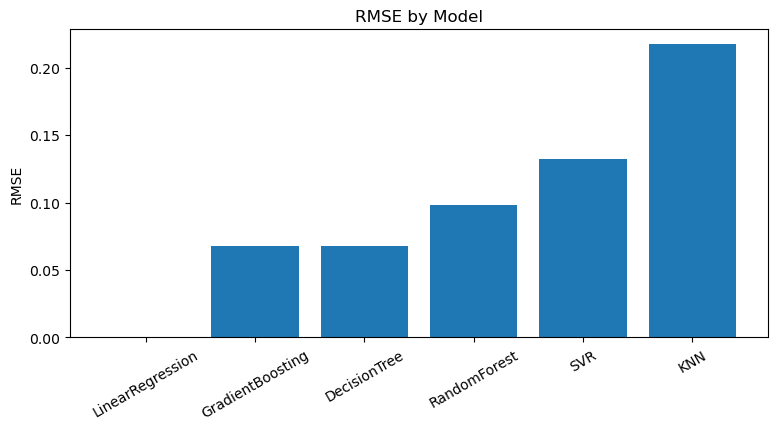

In [19]:
# Convert date to numeric
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].map(pd.Timestamp.toordinal)

target = "predicted_mean"
df = df.dropna(subset=[target])
X = df.drop(columns=[target])
y = df[target].astype(float)

numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = X.select_dtypes(include=["object", "category", "bool"]).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),
        ("cat", categorical_transformer, categorical_cols)
    ]
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

models = {
    "LinearRegression": LinearRegression(),
    "DecisionTree": DecisionTreeRegressor(random_state=42),
    "RandomForest": RandomForestRegressor(n_estimators=200, random_state=42),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=150, random_state=42),
    "KNN": KNeighborsRegressor(n_neighbors=5),
    "SVR": SVR()
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)
results = []

results = []

for name, model in models.items():
    pipe = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("model", model)
    ])
    pipe.fit(X_train, y_train)
    predictions = pipe.predict(X_test)

    mse = mean_squared_error(y_test, predictions)
    rmse = mse ** 0.5
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    results.append({
        "Model": name,
        "RMSE": rmse,
        "MAE": mae,
        "R2 Score": r2
    })

results_df = pd.DataFrame(results)
print(results_df)


results_df = pd.DataFrame(results).sort_values(by="RMSE")
print("\n Model Performance Comparison Table")
print(results_df)

# Plot RMSE Comparison
plt.figure(figsize=(9, 4))
plt.bar(results_df["Model"], results_df["RMSE"])
plt.title("RMSE by Model")
plt.ylabel("RMSE")
plt.xticks(rotation=30)
plt.show()



In [21]:
# Pick the best model based on lowest RMSE
best_model_row = results_df.sort_values(by="RMSE").iloc[0]

best_model_name = best_model_row["Model"]
best_model_rmse = best_model_row["RMSE"]
best_model_r2 = best_model_row["R2 Score"]

print("\n Best Model Selected Automatically:")
print(f"Model: {best_model_name}")
print(f"RMSE: {best_model_rmse}")
print(f"R² Score: {best_model_r2}")



 Best Model Selected Automatically:
Model: LinearRegression
RMSE: 1.0255800994045674e-15
R² Score: 1.0


In [22]:
import pandas as pd

# Example: your DataFrame
data = {
    "Model": ["LinearRegression", "GradientBoosting", "DecisionTree", "RandomForest", "SVR", "KNN"],
    "RMSE": [1.025580e-15, 6.758953e-02, 6.758988e-02, 9.781350e-02, 1.323606e-01, 2.173418e-01],
    "MAE": [5.921189e-16, 6.656496e-02, 6.656521e-02, 7.637860e-02, 1.180818e-01, 1.785866e-01],
    "R2 Score": [1.0, 0.967541, 0.967541, 0.932022, 0.875523, 0.664373]
}

df = pd.DataFrame(data)

# Save as CSV
df.to_csv("model_performance.csv", index=False)



In [ ]:
import pandas as pd

# Example: your model performance table
data = {
    "Model": ["LinearRegression", "GradientBoosting", "DecisionTree", "RandomForest", "SVR", "KNN"],
    "RMSE": [1.025580e-15, 6.758953e-02, 6.758988e-02, 9.781350e-02, 1.323606e-01, 2.173418e-01],
    "MAE": [5.921189e-16, 6.656496e-02, 6.656521e-02, 7.637860e-02, 1.180818e-01, 1.785866e-01],
    "R2 Score": [1.0, 0.967541, 0.967541, 0.932022, 0.875523, 0.664373]
}

df = pd.DataFrame(data)

# Automatically select the best model (highest R2 Score)
best_row = df.loc[df["R2 Score"].idxmax()]

best_model = best_row["Model"]
rmse = best_row["RMSE"]
r2 = best_row["R2 Score"]

# Save as CSV
df_best = pd.DataFrame({
    "Model": [best_model],
    "RMSE": [rmse],
    "R2 Score": [r2]
})

df_best.to_csv("best_model.csv", index=False)
print(f"Best model saved: {best_model}")
